# Assignment 3 - COMP 6934
### Name: Ganeshkirubashankar Pavadaisamy
### Student ID: 202192154
### Date: 22 Feb 2023

### Importing Pandas Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df = pd.read_csv('olympic_athletes.csv')

### Exploring the Dataset

#### Checking the First 5 Rows of Dataset

In [3]:
df.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


### Getting Information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


### Checking Total no.of. rows / no. of. data in df

In [5]:
len(df)

271116

### Checking the columns in df

In [6]:
df.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

### Getting  a descriptive statistics summary of the dataframe.

In [7]:
df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


### Creating a df copy with Null values in df and Drop the null values and save in another df

In [8]:
tdf=df.copy()
df=df.dropna()

### Question 1:  The following violin plot shows the height distributions of athletes in the Gymnastics, Cycling and Basketball sports at the Olympic games between 2000 to 2016 (inclusive). The line inside each violin shows the location of the median value.
### Recreate the above violin plot using Matplotlib. The three violins should be purple, green and blue in colour, including their filled colour and the colour of the median lines (Hint: consider the return values of the violin plot method). Include the x-axis and y-axis labels, as well as the plot title.

### Since some athletes may compete in multiple events or multiple Olympics, make sure to include only one instance of an athlete (no duplicates).

In [9]:
# Creating the df with only with the Sports and Height Columns
sports_list = ['Gymnastics', 'Cycling', 'Basketball']
sport_df = df[(df['Sport'].isin(sports_list))]
# Filtering df for years only from 2000 to 2016
sport_df = sport_df[(sport_df['Year'].isin(range(2000, 2016)))]
#Dropping duplicate values of Athletes as mentioned in the question
sport_df.drop_duplicates(subset=['Name','Height'], keep='first', inplace=True)
sport_df = sport_df[['Sport','Height']]
sport_df

#Source Attribution
# the above code is isnpired from below web pages
#https://sparkbyexamples.com/pandas/pandas-isin-explained-with-examples/
#https://www.digitalocean.com/community/tutorials/pandas-drop-duplicate-rows-drop_duplicates-function

,Sport,Height
195,Cycling,163.0
609,Basketball,202.0
789,Gymnastics,161.0
1035,Basketball,188.0
1044,Cycling,180.0
...,...,...
269815,Cycling,162.0
270326,Gymnastics,173.0
270431,Gymnastics,158.0
270483,Gymnastics,164.0


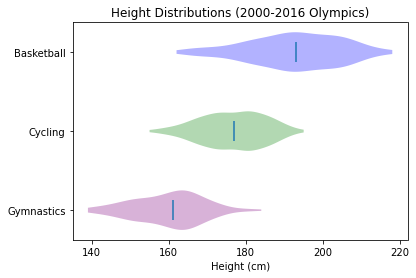

In [10]:
# Plotting the violinPlot
#Storing values of Heights of different sport and plotting together in same fig
a = np.array(sport_df[sport_df.Sport == 'Gymnastics'].Height)
b = np.array(sport_df[sport_df.Sport == 'Cycling'].Height)
c = np.array(sport_df[sport_df.Sport == 'Basketball'].Height)
f = [a,b,c]
fig, ax = plt.subplots()
violin_plot = ax.violinplot(f,vert=False,showextrema=False,showmedians=True)
#Setting labels and title
ax.set_xticks([140,160,180,200,220])
ax.set_yticks([1, 2, 3])
ax.set_yticklabels(sports_list)
ax.set_xlabel('Height (cm)')
ax.set_title('Height Distributions (2000-2016 Olympics)')
# Setting the color of violinplot as mentioned in the question.
violin_plot["bodies"][0].set_facecolor('purple')
violin_plot["bodies"][1].set_facecolor('green')
violin_plot["bodies"][2].set_facecolor('blue')
#Plots may be slightly inaccurate even though implemented the logic needed for Question

#Source Attribution
#https://stackoverflow.com/questions/26291479/changing-the-color-of-matplotlibs-violin-plots

### Question 2: (35 pts) This line plot shows the average height of male (blue) and female (red) Olympians over the history of the Summer Olympics. The shaded region represents the standard deviation about the average.
### Recreate the above line plot using Matplotlib. Include the axes labels, plot title, and legend in the lower left corner. The average male heights should be blue and average female heights red. Each athlete should only be represented once in a given year.
### Each line should include shading that has width equal to twice the standard deviation, that is, the top of the shaded region is the average value plus the standard deviation, and the bottom of the shaded region is the average value minus the standard deviation (hint: try fill_between()). The shading uses a transparency value of 0.1.

In [11]:
#Creating a df for plotting
# Dropping Duplicate values of athletes completing in multiple sport
height_df = tdf[tdf.Season=='Summer'].drop_duplicates(subset=['Name','Year'], keep='first')
height_df = height_df.groupby(['Sex','Year']).agg({'Height': ['mean', 'std']})
height_df

Height           
                mean        std
Sex Year                       
F   1900         NaN        NaN
    1904         NaN        NaN
    1906         NaN        NaN
    1908         NaN        NaN
    1912         NaN        NaN
    1920  161.800000   8.470116
    1924  162.650000   8.462145
    1928  168.509434   6.485554
    1932  167.307692   6.049078
    1936  167.144737   6.898703
    1948  168.182927   5.784458
    1952  166.583333   6.386191
    1956  166.307317   6.692709
    1960  165.666667   7.001997
    1964  166.452774   7.154795
    1968  167.206675   7.300185
    1972  167.324561   6.917981
    1976  169.569145   8.018417
    1980  169.932666   9.249478
    1984  169.366170   8.627172
    1988  169.652355   8.940016
    1992  170.042125   8.806052
    1996  169.995671   8.886900
    2000  170.128040   8.797435
    2004  170.115421   8.921707
    2008  170.353897   8.860872
    2012  170.332318   8.810706
    2016  170.026967   8.723988
M   1896  174.857143  10.189415
    1900  175.115385   8.243010
    1904  175.825581   7.976719
    1906  177.362637   7.199562
    1908  176.619433   7.567643
    1912  177.305177   7.271439
    1920  176.353774   7.555458
    1924  176.370567   7.527516
    1928  176.630909   8.253064
    1932  175.237003   8.567386
    1936  177.609687   8.270831
    1948  178.628225   8.059422
    1952  178.429487   8.352213
    1956  177.912157   8.656091
    1960  176.397765   8.429623
    1964  176.946458   8.945327
    1968  177.484332   9.148078
    1972  178.211571   9.502000
    1976  178.860973   9.942042
    1980  179.274873  10.247252
    1984  179.339399   9.933260
    1988  179.782797  10.151355
    1992  180.852039  10.016786
    1996  181.091937  10.019863
    2000  181.520782   9.824411
    2004  181.811727   9.986152
    2008  182.010183  10.048881
    2012  182.404137  10.124463
    2016  182.151159  10.073213

In [12]:
#Creating new columns Mean and Std Deviation of Height for Plotting
height_df.columns = ['Height_Mean', 'Height_Std']
height_df = height_df.reset_index()
height_df

,Sex,Year,Height_Mean,Height_Std
0,F,1900,NaN,NaN
1,F,1904,NaN,NaN
2,F,1906,NaN,NaN
3,F,1908,NaN,NaN
4,F,1912,NaN,NaN
5,F,1920,161.800000,8.470116
6,F,1924,162.650000,8.462145
7,F,1928,168.509434,6.485554
8,F,1932,167.307692,6.049078
9,F,1936,167.144737,6.898703


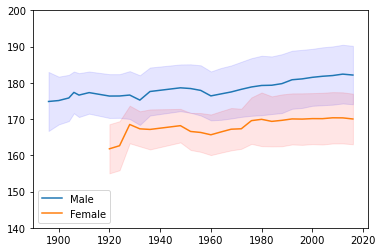

In [13]:
#Plotting the graph for Height with shading with of mean and Std Deviation
fig, ax = plt.subplots()
ax.plot(height_df[height_df.Sex == 'M']['Year'],height_df[height_df.Sex == 'M']['Height_Mean'])
ax.plot(height_df[height_df.Sex == 'F']['Year'],height_df[height_df.Sex == 'F']['Height_Mean'])
plt.legend(["Male","Female"], loc='lower left')
#creating constant values for shading width 
c = 0.8
ax.fill_between(height_df[height_df['Sex'] == 'M']['Year'], height_df[height_df['Sex'] == 'M']['Height_Mean'] - c*height_df[height_df['Sex'] == 'M']['Height_Std'], height_df[height_df['Sex'] == 'M']['Height_Mean'] + c*height_df[height_df['Sex'] == 'M']['Height_Std'], color='blue', alpha=0.1)
ax.fill_between(height_df[height_df['Sex'] == 'F']['Year'], height_df[height_df['Sex'] == 'F']['Height_Mean'] - c*height_df[height_df['Sex'] == 'F']['Height_Std'], height_df[height_df['Sex'] == 'F']['Height_Mean'] + c*height_df[height_df['Sex'] == 'F']['Height_Std'], color='red', alpha=0.1)
ax.set_yticks(range(140,210,10))
plt.show()

#Plots may be slightly inaccurate even though implemented the logic needed for Question

# Source Attribution
#https://stackoverflow.com/questions/16417496/matplotlib-fill-between-multiple-lines
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill_between_demo.html

### Question 3: (35 pts) The bar plot below shows the top 10 most decorated Olympians. That is, the Olympic athletes that have won the highest total number of medals. Each bar is colour coded according to the number of gold, silver and bronze medals won by that athlete. In this way, the total number of medals won is represented, along with the breakdown per medal type.

In [14]:
# Creating Df for plotting the bar plot
# Selecting the df by athlete name and medal type and calculate total number of medals
medal_df = tdf.groupby(['Name', 'Medal'])['Medal'].agg('count').unstack(fill_value=0)
medal_df = medal_df[['Gold', 'Silver','Bronze']]
#Calculating the total no.of medals of each athlete
medal_df['Total'] = medal_df.sum(axis=1)
medal_df = medal_df.sort_values(['Total','Gold'], ascending=[False, False])
medal_df

Medal,Gold,Silver,Bronze,Total
Name,,,,
"Michael Fred Phelps, II",23,3,2,28
Larysa Semenivna Latynina (Diriy-),9,5,4,18
Nikolay Yefimovich Andrianov,7,5,3,15
Ole Einar Bjrndalen,8,4,1,13
Borys Anfiyanovych Shakhlin,7,4,2,13
...,...,...,...,...
ukasz Zygmunt Pawowski,0,1,0,1
va Angyal,0,0,1,1
va Csernoviczki,0,0,1,1


In [15]:
#Selecting Top 10 Medalist
medal_df  = medal_df .head(10)
medal_df

Medal,Gold,Silver,Bronze,Total
Name,,,,
"Michael Fred Phelps, II",23,3,2,28
Larysa Semenivna Latynina (Diriy-),9,5,4,18
Nikolay Yefimovich Andrianov,7,5,3,15
Ole Einar Bjrndalen,8,4,1,13
Borys Anfiyanovych Shakhlin,7,4,2,13
Edoardo Mangiarotti,6,5,2,13
Takashi Ono,5,4,4,13
Paavo Johannes Nurmi,9,3,0,12
Birgit Fischer-Schmidt,8,4,0,12


In [16]:
#Dropping the Column Total as it is not needed
medal_df  = medal_df .drop(columns=['Total'])
medal_df 

Medal,Gold,Silver,Bronze
Name,,,
"Michael Fred Phelps, II",23,3,2
Larysa Semenivna Latynina (Diriy-),9,5,4
Nikolay Yefimovich Andrianov,7,5,3
Ole Einar Bjrndalen,8,4,1
Borys Anfiyanovych Shakhlin,7,4,2
Edoardo Mangiarotti,6,5,2
Takashi Ono,5,4,4
Paavo Johannes Nurmi,9,3,0
Birgit Fischer-Schmidt,8,4,0


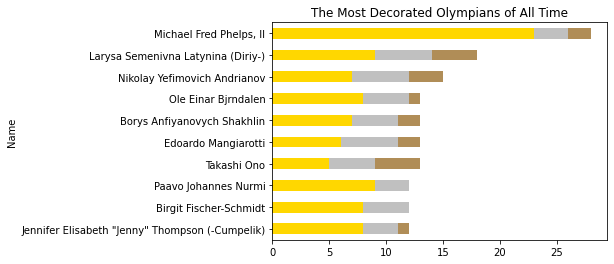

In [17]:
# Plotting the Stacked Bar Graph based on the color given in the question.
medal_df.plot(kind='barh', stacked=True, color=['#FFD700', '#C0C0C0','#B08D57'], legend=None)
# setting plot title and Label
plt.title('The Most Decorated Olympians of All Time')
#Sorting the values from high to low
plt.gca().invert_yaxis()
plt.show()

### Inference
### * I have used df and tdf , the dataframes with and without null values based on the output required, the plot is changing when i was using df with null values.
